##**CASE STUDY 3 -Kural Tabanlı Sınıflandırma ile Potansiyel Müşteri Getirisi Hesaplama** 

**GÖREV 1**

In [ ]:
#Soru 1: persona.csv dosyasını okutunuz ve veri seti ile ilgili genel bilgileri gösteriniz.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/MIUUL/pythonProgramlama2-220723/python_for_data_science/data_analysis_with_python/datasets/persona.csv")
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [ ]:
#Soru 2: Kaç unique SOURCE vardır? Frekansları nedir?
print(df["SOURCE"].value_counts())

android    2974
ios        2026
Name: SOURCE, dtype: int64


In [ ]:
#Soru 3: Kaç unique PRICE vardır?
df["PRICE"].nunique()

6

In [ ]:
#Soru 4: Hangi PRICE'dan kaçar tane satış gerçekleşmiş?
print(df["PRICE"].value_counts())

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64


In [ ]:
#Soru 5: Hangi ülkeden kaçar tane satış olmuş?
print(df["COUNTRY"].value_counts())

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64


In [ ]:
#Soru 6: Ülkelere göre satışlardan toplam ne kadar kazanılmış?
print(df.groupby("COUNTRY").agg({"PRICE": ["sum"]}))

         PRICE
           sum
COUNTRY       
bra      51354
can       7730
deu      15485
fra      10177
tur      15689
usa      70225


In [ ]:
#Soru 7: SOURCE türlerine göre satış sayıları nedir?
print(df.groupby("SOURCE").agg({"PRICE": ["count"]}))

        PRICE
        count
SOURCE       
android  2974
ios      2026


In [ ]:
#Soru 8: Ülkelere göre PRICE ortalamaları nedir?
print(df.groupby("COUNTRY").agg({"PRICE": ["mean"]}))

             PRICE
              mean
COUNTRY           
bra      34.327540
can      33.608696
deu      34.032967
fra      33.587459
tur      34.787140
usa      34.007264


In [ ]:
#Soru 9: SOURCE'lara göre PRICE ortalamaları nedir?
print(df.groupby("SOURCE").agg({"PRICE": ["mean"]}))

             PRICE
              mean
SOURCE            
android  34.174849
ios      34.069102


In [ ]:
#Soru 10: COUNTRY-SOURCE kırılımında PRICE ortalamaları nedir?

df.groupby(["COUNTRY", "SOURCE"]).agg({"PRICE": ["mean"]})

PRICE
                      mean
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

**GÖREV 2**
COUNTRY, SOURCE, SEX, AGE kırılımında ortalama kazançlar nedir?

In [ ]:
df.groupby(["COUNTRY", "SOURCE","SEX","AGE"]).agg({"PRICE": "mean"})

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

**GÖREV 3**
Çıktıyı PRICE’a göre desc sıralayınız. Çıktıyı agg_df olarak kaydediniz.

In [ ]:

agg_df= df.groupby(["COUNTRY", "SOURCE","SEX","AGE"]).agg({"PRICE": "mean"}).sort_values ("PRICE", ascending=False)
agg_df

PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android male   46    59.0
usa     android male   36    59.0
fra     android female 24    59.0
usa     ios     male   32    54.0
deu     android female 36    49.0
...                           ...
usa     ios     female 38    19.0
                       30    19.0
can     android female 27    19.0
fra     android male   18    19.0
deu     android male   26     9.0

[348 rows x 1 columns]

**GÖREV 4**
Indekste yer alan isimleri değişken ismine çeviriniz.

In [ ]:
agg_df=agg_df.reset_index()
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0
...,...,...,...,...,...
343,usa,ios,female,38,19.0
344,usa,ios,female,30,19.0
345,can,android,female,27,19.0
346,fra,android,male,18,19.0


**GÖREV 5**
Age değişkenini kategorik değişkene çeviriniz ve agg_df’e ekleyiniz.

In [ ]:
agg_df["AGE_CAT"]=pd.cut(df["AGE"], [0, 19, 24, 31, 41, agg_df["AGE"].max()], labels=['0_18', '19_23', '24_30', '31_40', '41_'+ str(agg_df["AGE"].max())])
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,0_18
1,usa,android,male,36,59.0,0_18
2,fra,android,female,24,59.0,0_18
3,usa,ios,male,32,54.0,0_18
4,deu,android,female,36,49.0,0_18
...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,0_18
344,usa,ios,female,30,19.0,0_18
345,can,android,female,27,19.0,0_18
346,fra,android,male,18,19.0,0_18


**GÖREV 6**
Yeni seviye tabanlı müşterileri (persona) tanımlayınız ve ve veri setine değişken olarak ekleyiniz. Yeni eklenecek değişkenin adı: customers_level_based.Önceki soruda elde edeceğiniz çıktıdaki gözlemleri bir araya getirerek customers_level_based değişkenini oluşturmanız gerekmektedir.Dikkat! List comprehension ile customers_level_based değerleri oluşturulduktan sonra bu değerlerin tekilleştirilmesi gerekmektedir.
Örneğin birden fazla şu ifadeden olabilir: USA_ANDROID_MALE_0_18. Bunları groupby'a alıp price ortalamalarını almak gerekmektedir.

In [ ]:
#gözlemler
#for row in agg_df.values:
#  print(row)

agg_df["customer_level_based"]=[row[0].upper()+'_'+row[1].upper()+'_'+row[2].upper()+'_'+row[5].upper() for row in agg_df.values]
agg_df=agg_df[["customer_level_based","PRICE"]]
agg_df

,customer_level_based,PRICE
0,BRA_ANDROID_MALE_0_18,59.0
1,USA_ANDROID_MALE_0_18,59.0
2,FRA_ANDROID_FEMALE_0_18,59.0
3,USA_IOS_MALE_0_18,54.0
4,DEU_ANDROID_FEMALE_0_18,49.0
...,...,...
343,USA_IOS_FEMALE_0_18,19.0
344,USA_IOS_FEMALE_0_18,19.0
345,CAN_ANDROID_FEMALE_0_18,19.0
346,FRA_ANDROID_MALE_0_18,19.0


In [ ]:
for i in agg_df["customer_level_based"].values:
  print(i.split("_")) #aynı datadan birçok var bunları tekilleştireceğiz.


['BRA', 'ANDROID', 'MALE', '0', '18']
['USA', 'ANDROID', 'MALE', '0', '18']
['FRA', 'ANDROID', 'FEMALE', '0', '18']
['USA', 'IOS', 'MALE', '0', '18']
['DEU', 'ANDROID', 'FEMALE', '0', '18']
['DEU', 'ANDROID', 'FEMALE', '0', '18']
['DEU', 'IOS', 'MALE', '0', '18']
['USA', 'ANDROID', 'FEMALE', '0', '18']
['FRA', 'IOS', 'MALE', '0', '18']
['USA', 'IOS', 'MALE', '0', '18']
['DEU', 'ANDROID', 'MALE', '0', '18']
['BRA', 'ANDROID', 'FEMALE', '0', '18']
['USA', 'ANDROID', 'FEMALE', '0', '18']
['TUR', 'IOS', 'MALE', '0', '18']
['DEU', 'ANDROID', 'MALE', '0', '18']
['TUR', 'IOS', 'FEMALE', '0', '18']
['BRA', 'ANDROID', 'FEMALE', '0', '18']
['BRA', 'IOS', 'FEMALE', '24', '30']
['TUR', 'ANDROID', 'FEMALE', '24', '30']
['BRA', 'ANDROID', 'FEMALE', '24', '30']
['TUR', 'IOS', 'MALE', '24', '30']
['TUR', 'ANDROID', 'MALE', '24', '30']
['USA', 'IOS', 'MALE', '24', '30']
['BRA', 'IOS', 'MALE', '24', '30']
['DEU', 'ANDROID', 'MALE', '19', '23']
['USA', 'IOS', 'MALE', '19', '23']
['TUR', 'ANDROID', 'FEMAL

In [ ]:
agg_df= agg_df.groupby(["customer_level_based"]).agg({"PRICE": "mean"})
agg_df

,PRICE
customer_level_based,
BRA_ANDROID_FEMALE_0_18,35.747624
BRA_ANDROID_FEMALE_19_23,32.334962
BRA_ANDROID_FEMALE_24_30,32.666667
BRA_ANDROID_FEMALE_31_40,33.722222
BRA_ANDROID_FEMALE_41_66,36.682540
...,...
USA_IOS_MALE_0_18,38.239720
USA_IOS_MALE_19_23,33.504596
USA_IOS_MALE_24_30,30.811594


**GÖREV 7**
Yeni müşterileri (personaları) segmentlere ayırınız.Yeni müşterileri (Örnek: USA_ANDROID_MALE_0_18) PRICE’a göre 4 segmente ayırınız.Segmentleri SEGMENT isimlendirmesi ile değişken olarak agg_df’e ekleyiniz.Segmentleri betimleyiniz (Segmentlere göre group by yapıp price mean, max, sum’larını alınız).

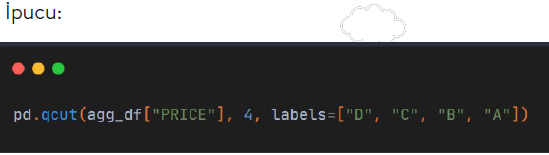

In [ ]:
agg_df['PRICE_SEGMENT'] = pd.qcut(agg_df['PRICE'], q=4, labels=["D","C","B","A"])
agg_df

,PRICE,PRICE_SEGMENT
customer_level_based,,
BRA_ANDROID_FEMALE_0_18,35.747624,B
BRA_ANDROID_FEMALE_19_23,32.334962,C
BRA_ANDROID_FEMALE_24_30,32.666667,C
BRA_ANDROID_FEMALE_31_40,33.722222,C
BRA_ANDROID_FEMALE_41_66,36.682540,B
...,...,...
USA_IOS_MALE_0_18,38.239720,A
USA_IOS_MALE_19_23,33.504596,C
USA_IOS_MALE_24_30,30.811594,D


In [ ]:
agg_df.reset_index().head()
agg_df = agg_df.reset_index()
agg_df.head()

,customer_level_based,PRICE,PRICE_SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.747624,B
1,BRA_ANDROID_FEMALE_19_23,32.334962,C
2,BRA_ANDROID_FEMALE_24_30,32.666667,C
3,BRA_ANDROID_FEMALE_31_40,33.722222,C
4,BRA_ANDROID_FEMALE_41_66,36.682540,B


**GÖREV 8**
Yeni gelen müşterileri sınıflandırıp, ne kadar gelir getirebileceklerini tahmin ediniz.
* 33 yaşında ANDROID kullanan bir Türk kadını hangi segmente aittir ve ortalama ne kadar gelir kazandırması beklenir?
* 35 yaşında IOS kullanan bir Fransız kadını hangi segmente aittir ve ortalama ne kadar gelir kazandırması beklenir?
İpucu:

In [ ]:
import pandas as pd
# specify the file path and name
file_path = r'data.xlsx'
# export data to Excel file
agg_df.to_excel(file_path, index=False)
print("Data exported to Excel file:", file_path)


Data exported to Excel file: data.xlsx


In [ ]:
new_user="TUR_ANDROID_FEMALE_31_40"
agg_df[agg_df["customer_level_based"]==new_user]

,customer_level_based,PRICE,PRICE_SEGMENT
63,TUR_ANDROID_FEMALE_31_40,31.0,D
